# model ciconia ciconia

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import os
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_ciconia_ciconia = pd.read_csv("df_Ciconia_ciconia")

In [3]:
df_ciconia_ciconia.head()

,Unnamed: 0,eventDate,year,month,day,continent,Country,City,Specie
0,0,2015-07-15T06:00:00,2015,7,15,EUROPE,Slovenia,Osrednjeslovenska,Ciconia ciconia
1,1,2015-07-15T06:00:00,2015,7,15,EUROPE,Slovenia,Osrednjeslovenska,Ciconia ciconia
2,2,2015-07-15T09:00:00,2015,7,15,EUROPE,Slovenia,Osrednjeslovenska,Ciconia ciconia
3,3,2015-07-15T09:00:00,2015,7,15,EUROPE,Slovenia,Osrednjeslovenska,Ciconia ciconia
4,4,2015-07-15T12:00:00,2015,7,15,EUROPE,Slovenia,Osrednjeslovenska,Ciconia ciconia


In [4]:
df_ciconia_ciconia["eventDate"] = pd.to_datetime(df_ciconia_ciconia["eventDate"])

df_ciconia_ciconia["eventDate"]= df_ciconia_ciconia["eventDate"].dt.strftime('%Y/%m/%d')

In [5]:
df_ciconia_ciconia.drop("Unnamed: 0", axis =1, inplace = True)

In [6]:
df_ciconia_ciconia.set_index(df_ciconia_ciconia["eventDate"], inplace=True)

In [7]:
# df_ciconia_ciconia.drop(["eventDate"], axis= 1, inplace = True)

In [8]:
df_ciconia_ciconia

,eventDate,year,month,day,continent,Country,City,Specie
eventDate,,,,,,,,
2015/07/15,2015/07/15,2015,7,15,EUROPE,Slovenia,Osrednjeslovenska,Ciconia ciconia
2015/07/15,2015/07/15,2015,7,15,EUROPE,Slovenia,Osrednjeslovenska,Ciconia ciconia
2015/07/15,2015/07/15,2015,7,15,EUROPE,Slovenia,Osrednjeslovenska,Ciconia ciconia
2015/07/15,2015/07/15,2015,7,15,EUROPE,Slovenia,Osrednjeslovenska,Ciconia ciconia
2015/07/15,2015/07/15,2015,7,15,EUROPE,Slovenia,Osrednjeslovenska,Ciconia ciconia
...,...,...,...,...,...,...,...,...
2016/11/29,2016/11/29,2016,11,29,AFRICA,Kenya,Uasin Gishu,Ciconia ciconia
2016/11/29,2016/11/29,2016,11,29,AFRICA,Kenya,Uasin Gishu,Ciconia ciconia
2016/11/29,2016/11/29,2016,11,29,AFRICA,Kenya,Uasin Gishu,Ciconia ciconia


# SQL connector

In [9]:
import mysql.connector as sql    # intsall mysql-connector-python not sql-connector

In [10]:
hostname="localhost"
dbname="cdac_project"
uname="root"
pwd="manager"

In [11]:
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
				.format(host=hostname, db=dbname, user=uname, pw=pwd))

In [12]:
df_ciconia_ciconia.to_sql(f'df_ciconia_ciconia_24_12_2', engine, index=False)

In [13]:
# this we shifted below
mydb = sql.connect(
    host="localhost", user="root", password="manager", database="cdac_project"
)



In [14]:
def query(query):
    mycursor = mydb.cursor()
    sql = query
    mycursor.execute(sql)
    result = mycursor.fetchall()
    mycursor.close()

    return pd.DataFrame(result)

In [15]:
df_ciconia_ciconia.head()

,eventDate,year,month,day,continent,Country,City,Specie
eventDate,,,,,,,,
2015/07/15,2015/07/15,2015,7,15,EUROPE,Slovenia,Osrednjeslovenska,Ciconia ciconia
2015/07/15,2015/07/15,2015,7,15,EUROPE,Slovenia,Osrednjeslovenska,Ciconia ciconia
2015/07/15,2015/07/15,2015,7,15,EUROPE,Slovenia,Osrednjeslovenska,Ciconia ciconia
2015/07/15,2015/07/15,2015,7,15,EUROPE,Slovenia,Osrednjeslovenska,Ciconia ciconia
2015/07/15,2015/07/15,2015,7,15,EUROPE,Slovenia,Osrednjeslovenska,Ciconia ciconia


In [16]:
df_observation = query("SELECT COUNT(eventDate), eventDate as daily_spotting  FROM df_ciconia_ciconia_24_12_2 GROUP BY daily_spotting ORDER BY eventDate")


In [17]:
df_observation.rename({0:"daily_frequency",1:"date",2:"country",3:"city",4:"continent"},axis = 1, inplace=True)

In [18]:
df_observation

,daily_frequency,date
0,8,2015/07/15
1,8,2015/07/16
2,8,2015/07/17
3,8,2015/07/18
4,8,2015/07/19
...,...,...
472,4,2016/11/26
473,4,2016/11/27
474,4,2016/11/28
475,4,2016/11/29


In [19]:
df_observation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   daily_frequency  477 non-null    int64 
 1   date             477 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.6+ KB


In [20]:
pd.to_datetime(df_observation["date"])

0     2015-07-15
1     2015-07-16
2     2015-07-17
3     2015-07-18
4     2015-07-19
         ...    
472   2016-11-26
473   2016-11-27
474   2016-11-28
475   2016-11-29
476   2016-11-30
Name: date, Length: 477, dtype: datetime64[ns]

In [21]:
df_observation

,daily_frequency,date
0,8,2015/07/15
1,8,2015/07/16
2,8,2015/07/17
3,8,2015/07/18
4,8,2015/07/19
...,...,...
472,4,2016/11/26
473,4,2016/11/27
474,4,2016/11/28
475,4,2016/11/29


In [22]:
df_demo = df_observation.copy()

In [23]:
df_demo.set_index("date", inplace=True)

In [24]:
# df_demo.drop("date", axis =1, inplace = True)
df_demo.isna().sum()

daily_frequency    0
dtype: int64

In [25]:
df_demo.isna().sum()

daily_frequency    0
dtype: int64

In [26]:
del df_demo["country"],df_demo["city"],df_demo["continent"]

In [27]:
df_demo.index.freq = "D"

In [28]:
df_demo

,daily_frequency
date,
2015/07/15,8
2015/07/16,8
2015/07/17,8
2015/07/18,8
2015/07/19,8
...,...
2016/11/26,4
2016/11/27,4
2016/11/28,4


In [29]:
size = int(len(df_demo)*0.8)

df_train = df_demo.iloc[:size]
df_test  = df_demo.iloc[size:]

In [30]:
df_train.tail()

,daily_frequency
date,
2016/08/22,12
2016/08/23,14
2016/08/24,11
2016/08/25,25
2016/08/26,19


In [31]:
df_test.head()

,daily_frequency
date,
2016/08/27,27
2016/08/28,27
2016/08/29,27
2016/08/30,29
2016/08/31,28


<Axes: xlabel='date'>

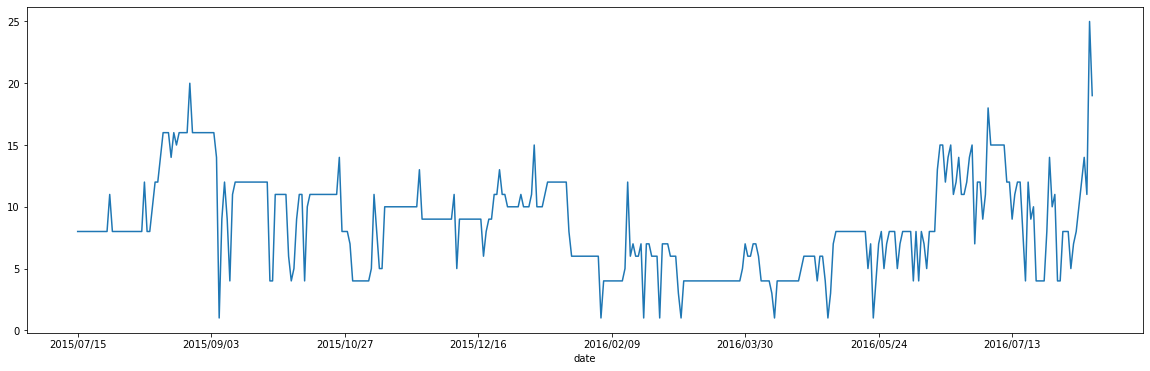

In [32]:
plt.figure(figsize=(20,6))
df_train.daily_frequency.plot()

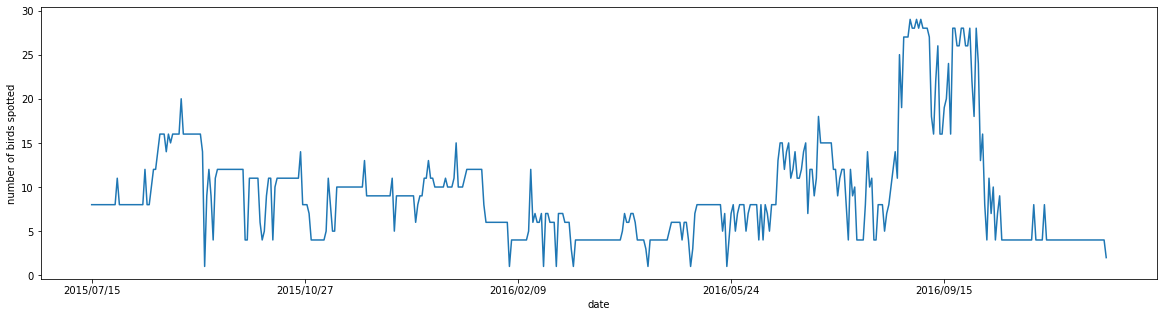

In [33]:
plt.figure(figsize=(20,5))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('number of birds spotted')
df_demo["daily_frequency"].plot()
# plt.title('ARCH CAPITAL GROUP closing price')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


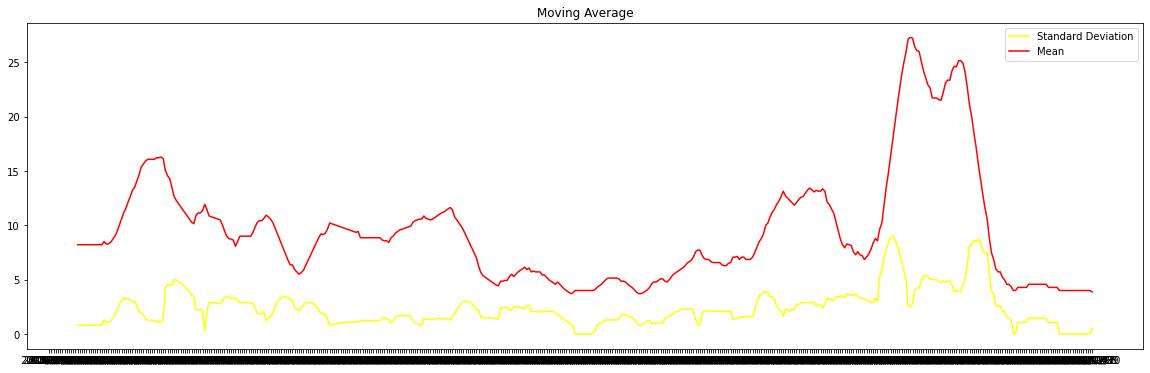

In [34]:
from pylab import rcParams

rcParams["figure.figsize"] = 20,6
moving_avg = df_demo.rolling(14).mean()
moving_std = df_demo.rolling(14).std()

plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(moving_std, color ="yellow", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

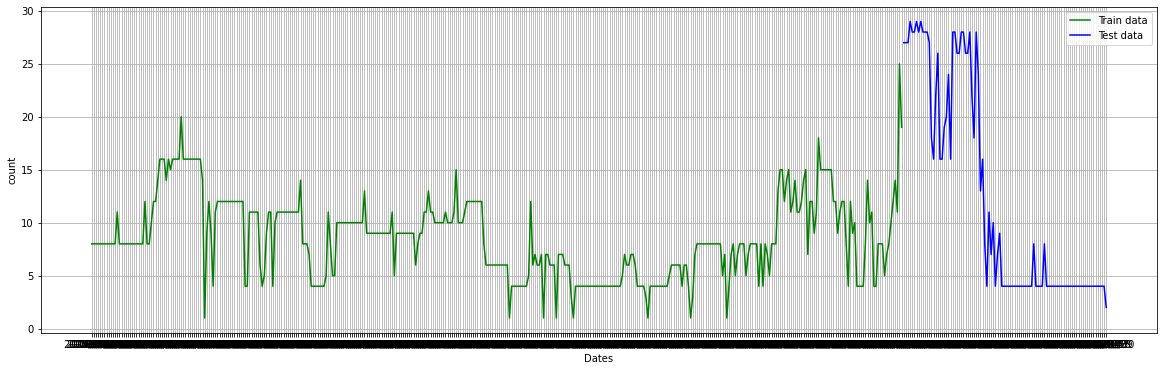

In [35]:
plt.figure(figsize=(20,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('count')
plt.plot(df_train, 'green', label='Train data')
plt.plot(df_test , 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1770.637, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1738.120, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1715.821, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1768.689, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1711.036, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1711.974, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1712.309, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1710.315, Time=0.04 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1712.304, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1713.000, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1708.529, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1714.032, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1710.523, Time=0.04 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=1710.519, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]          

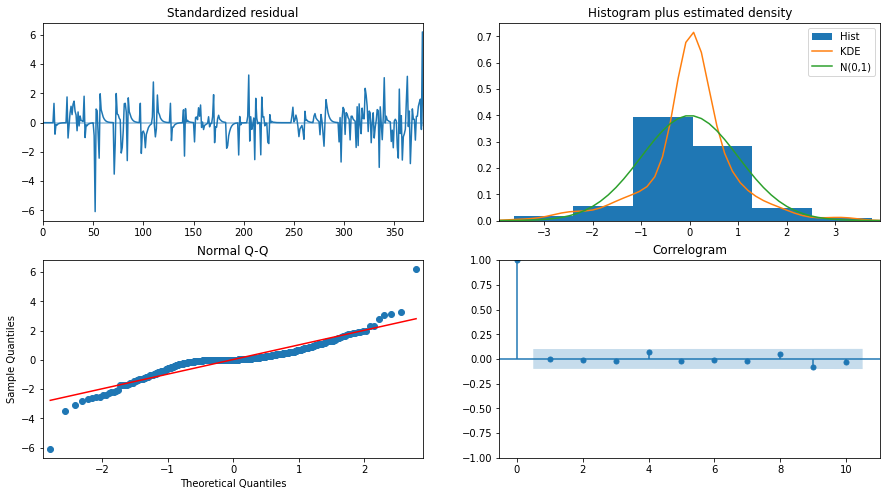

In [36]:
model_autoARIMA = auto_arima(df_train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [37]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_train,order=(0,1,2))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:        daily_frequency   No. Observations:                  381
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -851.265
Date:                Sun, 24 Dec 2023   AIC                           1708.529
Time:                        15:33:17   BIC                           1720.350
Sample:                             0   HQIC                          1713.220
                                - 381                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4043      0.046     -8.752      0.000      -0.495      -0.314
ma.L2         -0.1455      0.047     -3.092      0.002      -0.238      -0.053
sigma2         5.1639      0.174     29.632      0.0

/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [38]:
return_value = fitted.forecast(len(df_test),alpha = 0.05)

/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [39]:
return_value

381    17.131421
382    17.197304
383    17.197304
384    17.197304
385    17.197304
         ...    
472    17.197304
473    17.197304
474    17.197304
475    17.197304
476    17.197304
Name: predicted_mean, Length: 96, dtype: float64

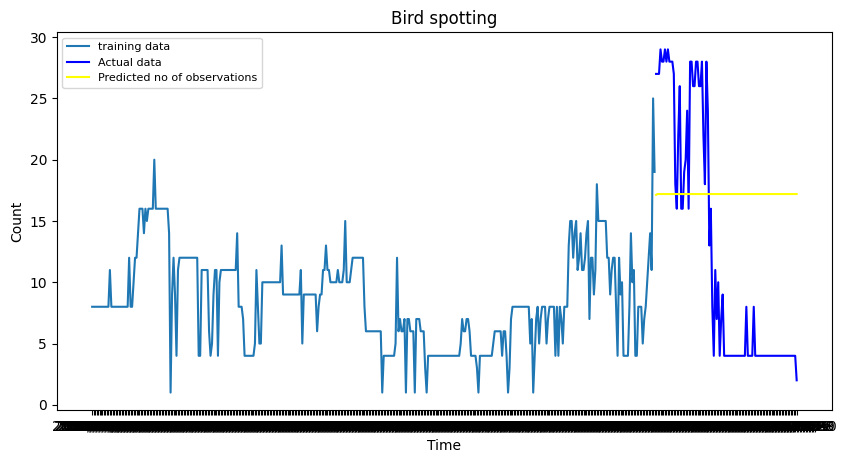

In [40]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(df_train, label='training data')
plt.plot(df_test, color = 'blue', label='Actual data')
plt.plot(return_value, color = 'yellow',label='Predicted no of observations')
plt.title('Bird spotting')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend(loc='upper left', fontsize=8)
plt.show()